# preprocessing


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [8]:
path = '../Data/rare_species 1'
df = pd.read_csv(path + '/metadata.csv')
df.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


## access the images

In [9]:
first_image = df['file_path'][0]
print(first_image)

full_first_image = path + '/' + first_image
print(full_first_image)

mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg
../Data/rare_species 1/mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg


type of img_raw:  <class 'tensorflow.python.framework.ops.EagerTensor'>
shape of img_raw: ()
type of img_tensor:  <class 'tensorflow.python.framework.ops.EagerTensor'>
shape of img_tensor: (400, 400, 3)


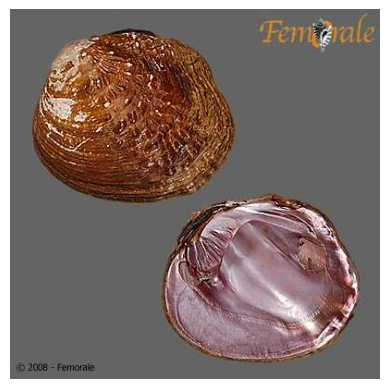

In [35]:
img_raw = tf.io.read_file(full_first_image)
print("type of img_raw: ", type(img_raw))
print(f"shape of img_raw: {img_raw.shape}")

# show the first image
img_tensor = tf.image.decode_image(img_raw)
print("type of img_tensor: ", type(img_tensor))
print(f"shape of img_tensor: {img_tensor.shape}")

plt.imshow(img_tensor)
plt.axis('off')
plt.show()

## resize the image


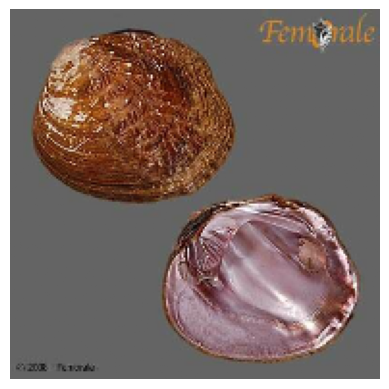

In [ ]:
resized_tensor = tf.image.resize(img_tensor, [192, 192])
resized_tensor = resized_tensor / 255.0
plt.imshow(resized_tensor)
plt.axis('off')
plt.show()

In [ ]:
print(f"shape of resized_tensor: {resized_tensor.shape}")

shape of resized_tensor: (192, 192, 3)


## center the values of the rgb channels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4339866..0.63847595].


values of the center pixel: [0.44832483 0.37977824 0.3587668 ]


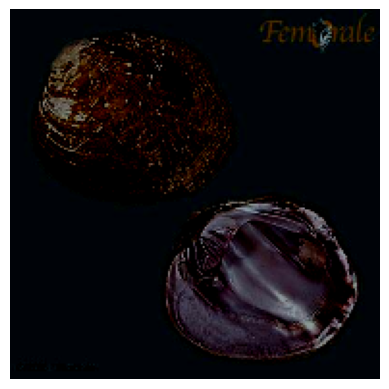

In [46]:
center_values = tf.reduce_mean(resized_tensor, axis=(0, 1))

print(f"values of the center pixel: {center_values}")

centered_tensor = resized_tensor - center_values
plt.imshow(centered_tensor)
plt.axis('off')
plt.show()



## rotate the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4339866..0.63847595].


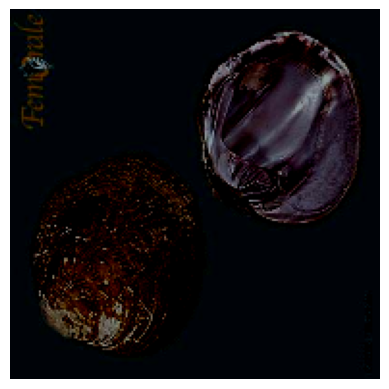

In [47]:
# rotate the image
rotated_tensor = tf.image.rot90(centered_tensor)
plt.imshow(rotated_tensor)
plt.axis('off')
plt.show()

## function to preprocess the image

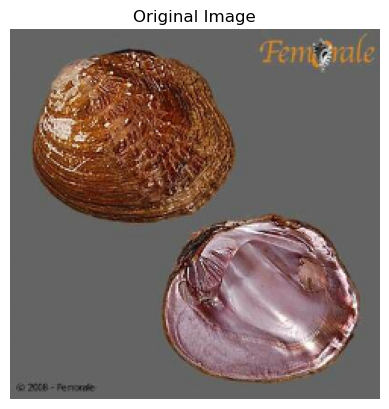

image shape: (244, 244, 3)


In [53]:
def preprocess_image(image, final_size= [244,244], rotate = 0):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, final_size)
    image /= 255.0 
    
    for _ in range(rotate):
        image = tf.image.rot90(image)
    return image

def load_and_preprocess_image(path, rotate = 0):
    image = tf.io.read_file(path)
    return preprocess_image(image, rotate = rotate)

def show_image(image, title):
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

image = load_and_preprocess_image(full_first_image)
show_image(image, 'Original Image')
print(f'image shape: {image.shape}')

# apply the preprocessing to the images to a model

In [ ]:
# import vv16
from tensorflow.keras.applications import VGG16

# VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford
# in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”.
# The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes.

# load the model
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (244, 244, 3))
vgg.summary()

# preprocess the image
image = load_and_preprocess_image(full_first_image)
image = tf.expand_dims(image, 0)

# get the features
features = vgg.predict(image)
print(f"shape of the features: {features.shape}")

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 244, 244, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 244, 244, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 244, 244, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 122, 122, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 122, 122, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 61, 61, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 61, 61, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
shape of the features: (1, 7, 7, 512)
